Column Extraction for Titanic Dataset
===

Derives a few potentially interesting variables from the existing raw data.

Writes out the new columns to a separate sheet for later merging.

In [38]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("../../data/raw/train.csv")
test = pd.read_csv("../../data/raw/train.csv")

In [3]:
test["Survived"] = 2

In [4]:
df = pd.concat((train, test))
len(df)

1782

In [5]:
df.head(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Ticket Cols

In [6]:
tickets = df["Ticket"]
tickets[:10]

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [7]:
t = list(tickets)

In [8]:
tix_cats = []
for ticket in tickets:
    if ticket.isdigit():
        tix_cat = "digit"
        tix_cats.append(tix_cat)
        continue
    parts = ticket.split(" ")
    if len(parts) > 2:
        print("Weird tix: multiple parts", ticket)
    if len(parts) == 2:
        if not parts[1].isdigit():
            print("Weird tix: non-digit", ticket)
    if len(parts) == 1:
        tix_cat = parts[0]
    else:
        tix_cat = " ".join(parts[:-1])
    tix_cat = tix_cat.replace(".", "")
    if tix_cat == "":
        print("Weird tix: no digit", ticket)
    tix_cats.append(tix_cat)
df["ticket_category"] = tix_cats

Weird tix: multiple parts STON/O 2. 3101294
Weird tix: multiple parts STON/O 2. 3101280
Weird tix: multiple parts STON/O 2. 3101275
Weird tix: multiple parts STON/O 2. 3101293
Weird tix: multiple parts STON/O 2. 3101289
Weird tix: multiple parts STON/O 2. 3101269
Weird tix: multiple parts STON/O 2. 3101274
Weird tix: multiple parts SC/AH Basle 541
Weird tix: multiple parts STON/O 2. 3101286
Weird tix: multiple parts STON/O 2. 3101273
Weird tix: multiple parts STON/O 2. 3101292
Weird tix: multiple parts STON/O 2. 3101285
Weird tix: multiple parts STON/O 2. 3101288
Weird tix: multiple parts STON/O 2. 3101294
Weird tix: multiple parts STON/O 2. 3101280
Weird tix: multiple parts STON/O 2. 3101275
Weird tix: multiple parts STON/O 2. 3101293
Weird tix: multiple parts STON/O 2. 3101289
Weird tix: multiple parts STON/O 2. 3101269
Weird tix: multiple parts STON/O 2. 3101274
Weird tix: multiple parts SC/AH Basle 541
Weird tix: multiple parts STON/O 2. 3101286
Weird tix: multiple parts STON/O 2. 

In [9]:
tix_cat_counts = Counter(tix_cats).most_common()
tix_cat_counts

[('digit', 1322),
 ('PC', 120),
 ('CA', 82),
 ('A/5', 38),
 ('SOTON/OQ', 30),
 ('STON/O 2', 24),
 ('W/C', 20),
 ('SC/PARIS', 14),
 ('STON/O2', 12),
 ('A/4', 12),
 ('SOC', 10),
 ('C', 10),
 ('FCC', 10),
 ('SC/Paris', 8),
 ('LINE', 8),
 ('PP', 6),
 ('SO/PP', 6),
 ('A5', 4),
 ('SW/PP', 4),
 ('P/PP', 4),
 ('SC/AH', 4),
 ('WE/P', 4),
 ('SOTON/O2', 4),
 ('SC/A4', 2),
 ('SP', 2),
 ('SO/C', 2),
 ('WEP', 2),
 ('A4', 2),
 ('SOP', 2),
 ('Fa', 2),
 ('SCO/W', 2),
 ('SC', 2),
 ('A/S', 2),
 ('SC/AH Basle', 2),
 ('FC', 2),
 ('CA/SOTON', 2)]

In [10]:
# Run some consolidation of categories...
#TODO Identify which columns should actually be merged!


In [11]:
# consolidate lower-count cabin letters into a single factor level
threshold = 7
drop_low_counts = False  # should we drop low counts, or generate a new factor?
new_tix_cat = None if drop_low_counts else "other"
for tix_cat, count in tix_cat_counts:
    if count < threshold:
        df["ticket_category"][df["ticket_category"] == tix_cat] = new_tix_cat

/home/levon003/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [12]:
Counter(df["ticket_category"]).most_common()

[('digit', 1322),
 ('PC', 120),
 ('CA', 82),
 ('other', 62),
 ('A/5', 38),
 ('SOTON/OQ', 30),
 ('STON/O 2', 24),
 ('W/C', 20),
 ('SC/PARIS', 14),
 ('STON/O2', 12),
 ('A/4', 12),
 ('SOC', 10),
 ('C', 10),
 ('FCC', 10),
 ('SC/Paris', 8),
 ('LINE', 8)]

## Cabin Cols

In [13]:
df["Cabin"][:10]

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [14]:
Counter(df["Cabin"]).most_common()[:20]

[(nan, 1374),
 ('G6', 8),
 ('C23 C25 C27', 8),
 ('B96 B98', 8),
 ('F33', 6),
 ('E101', 6),
 ('F2', 6),
 ('D', 6),
 ('C22 C26', 6),
 ('C123', 4),
 ('D33', 4),
 ('C52', 4),
 ('B28', 4),
 ('C83', 4),
 ('F G73', 4),
 ('D26', 4),
 ('B58 B60', 4),
 ('C2', 4),
 ('E33', 4),
 ('F4', 4)]

In [15]:
cabin_letters = []
for cabin in df["Cabin"]:
    if cabin is None:
        cabin_letters.append("n")
    else:
        cabin = str(cabin)
        cabin_letters.append(cabin[0])
        # Taking the first letter is generally safe, although there are a few entries with multiple letter types
df["cabin_first_letter"] = cabin_letters

In [16]:
cabin_letter_counts = Counter(df["cabin_first_letter"]).most_common()
cabin_letter_counts

[('n', 1374),
 ('C', 118),
 ('B', 94),
 ('D', 66),
 ('E', 64),
 ('A', 30),
 ('F', 26),
 ('G', 8),
 ('T', 2)]

In [17]:
# consolidate lower-count cabin letters into a single factor level
threshold = 40
drop_low_counts = False  # should we drop low counts, or generate a new factor?
new_cabin_letter = "n" if drop_low_counts else "o"
for cabin_letter, count in cabin_letter_counts:
    if count < threshold:
        df["cabin_first_letter"][df["cabin_first_letter"] == cabin_letter] = new_cabin_letter

/home/levon003/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [18]:
cabin_letter_counts = Counter(df["cabin_first_letter"]).most_common()
cabin_letter_counts

[('n', 1374), ('C', 118), ('B', 94), ('o', 66), ('D', 66), ('E', 64)]

## Name Cols

In [19]:
df["Name"][:10]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [32]:
name_word_lengths = []
name_char_lengths = []
name_titles = []

raw_name_titles = []
# Based on a quick historic assessment of the use of these honorifics,
# I mapped passenger titles to sub-categories
name_title_map = {
    "Ms.": "Miss.",
    "Mlle.": "Miss.",
    "Major.": "Military",
    "Col.": "Military",
    "Capt.": "Military",
    "Don.": "Nobility",
    "Mme.": "Mrs.",
    "Lady.": "Nobility",
    "Sir.": "Nobility",
    "Countess.": "Nobility",
    "Jonkheer.": "Nobility",
}

for name in df["Name"]:
    new_name = re.sub(
           r"\(.+\)", 
           "", 
           name)
    name_parts = new_name.split(" ")
    title_found = False
    for name_part in name_parts:
        if "." in name_part:
            title_found = True
            raw_name_titles.append(name_part)
            title = name_part
            if title in name_title_map:
                title = name_title_map[title]
            name_titles.append(title)
            
    name_length = len(name_parts)
    if title_found:
        name_length -= 1
    if name_length >= 5:
        # Count all names as 5+ words as 5 words
        name_length = 5
    name_word_lengths.append(name_length)
    
    #Length of the name without spaces, not including the title, minus 1 for the comma
    char_length = len("".join([np for np in name_parts if "." not in np])) - 1
    name_char_lengths.append(char_length)
    
df["name_word_length"] = name_word_lengths
df["name_char_length"] = name_char_lengths
df["name_title"] = name_titles
df["name_title_raw"] = raw_name_titles

In [33]:
Counter(raw_name_titles).most_common()

[('Mr.', 1034),
 ('Miss.', 364),
 ('Mrs.', 250),
 ('Master.', 80),
 ('Dr.', 14),
 ('Rev.', 12),
 ('Major.', 4),
 ('Mlle.', 4),
 ('Col.', 4),
 ('Don.', 2),
 ('Mme.', 2),
 ('Ms.', 2),
 ('Lady.', 2),
 ('Sir.', 2),
 ('Capt.', 2),
 ('Countess.', 2),
 ('Jonkheer.', 2)]

In [34]:
Counter(name_titles).most_common()

[('Mr.', 1034),
 ('Miss.', 370),
 ('Mrs.', 252),
 ('Master.', 80),
 ('Dr.', 14),
 ('Rev.', 12),
 ('Nobility', 10),
 ('Military', 10)]

In [35]:
Counter(df["name_word_length"]).most_common()

[(3, 862), (2, 628), (4, 264), (5, 28)]

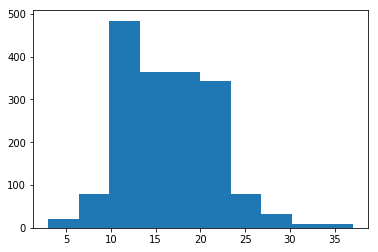

In [40]:
# Quick histogram of the character lengths of names
plt.hist(df["name_char_length"])
plt.show()

## Save output to CSV

In [42]:
subset_df = df[["PassengerId",
               "ticket_category", "cabin_first_letter", "name_title", 
               "name_title_raw", "name_word_length", "name_char_length"]]
output_filepath = "../../data/derived/levon003_new_cols.csv"
subset_df.to_csv(output_filepath, index=False)